In [1]:
import pandas as pd
import os


logbase = '/home/jos/tensorflowlogs/peregrine/v0.9.8'
lpq_infix = 'a3c_ff/lpq=True/glpq=True'
ff_infix = 'a3c_ff/lpq=False/glpq=False'
lpq2_infix= 'a3c_ff/lpq=True/glpq=False'

plot_items = [('A3C softmax', ff_infix), ('A3C LPQ', lpq2_infix), ('A3C GLPQ', lpq_infix)]

In [14]:
%matplotlib inline
fontsize = 20
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size': fontsize})
mpl.rc('xtick', labelsize=fontsize)
mpl.rc('ytick', labelsize=fontsize)
mpl.rc('figure', autolayout=True)
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [3]:
import colorlover as cl

colorscale = cl.scales['8']['qual']['Dark2']
colorscalen = []

for c in cl.to_numeric(colorscale):
    colorscalen.append((c[0]/255., c[1]/255, c[2]/255))
colorscalen.append((0., 0., 0.))
colorscalen.append((1., 0., 0.))

In [5]:
envs = os.listdir(logbase)
print(envs)

['Enduro', 'Qbert', 'Pong', 'BeamRider', 'Breakout', 'MsPacman', 'SpaceInvaders']


In [10]:
?sorted

In [4]:
def read_all_runs(path):
    dfs = []
    dirs = sorted(os.listdir(path), reverse=True)
    for subdir in dirs[:min(5, len(dirs))]:
        results_path = os.path.join(path, subdir, 'evals.csv')
        dfs.append(pd.read_csv(results_path, names=['Epoch', 'Score'], sep='\t'))
    return pd.concat(dfs)
        

Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Qbert/a3c_ff/lpq=False/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Qbert/a3c_ff/lpq=True/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Qbert/a3c_ff/lpq=True/glpq=True


/home/jos/anaconda3/envs/mproj0121/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


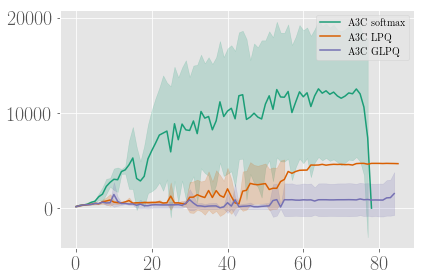

Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Pong/a3c_ff/lpq=False/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Pong/a3c_ff/lpq=True/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Pong/a3c_ff/lpq=True/glpq=True


/home/jos/anaconda3/envs/mproj0121/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


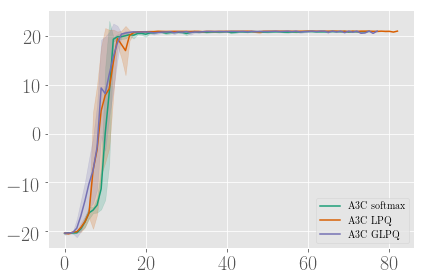

Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/BeamRider/a3c_ff/lpq=False/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/BeamRider/a3c_ff/lpq=True/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/BeamRider/a3c_ff/lpq=True/glpq=True


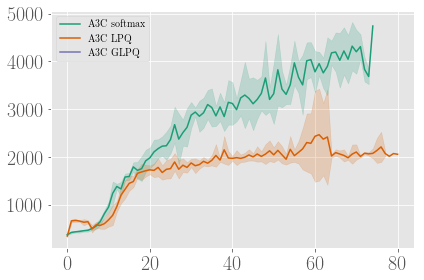

Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Breakout/a3c_ff/lpq=False/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Breakout/a3c_ff/lpq=True/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/Breakout/a3c_ff/lpq=True/glpq=True


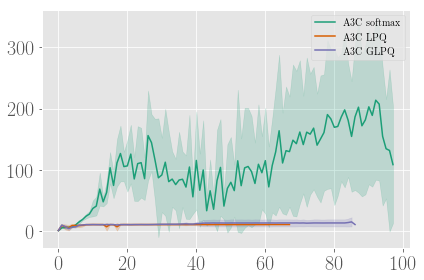

Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/SpaceInvaders/a3c_ff/lpq=False/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/SpaceInvaders/a3c_ff/lpq=True/glpq=False
Reading /home/jos/tensorflowlogs/peregrine/v0.9.8/SpaceInvaders/a3c_ff/lpq=True/glpq=True


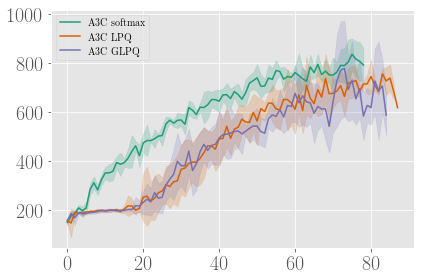

In [15]:
dfs_ff = []

all_dfs = []
for env_name in ['Qbert', 'Pong', 'BeamRider', 'Breakout', 'SpaceInvaders']:
    #dfs_lpq = read_all_runs(os.path.join(logbase, env_name, lpq_infix))
    
    plt.figure()
    for i, (name, infix) in enumerate(plot_items):
        print("Reading {}".format(os.path.join(logbase, env_name, infix)))
        df = read_all_runs(os.path.join(logbase, env_name, infix))
        averages = df.groupby(('Epoch',)).mean().reset_index()
        stds = df.groupby(('Epoch',)).std().reset_index()
        
        all_dfs.append(df)
        
        plt.fill_between(averages['Epoch'], averages['Score'] - stds['Score'],
                         averages['Score'] + stds['Score'], alpha=0.2, color=colorscalen[i])
        handles = [plt.plot(averages['Epoch'], averages['Score'], linewidth=1.5, color=colorscalen[i], label=name)]
        
        
    #dfs_ff_env = read_all_runs(os.path.join(logbase, env_name, ff_infix))
    #dfs_ff_env['Environment'] = env_name
    #dfs_ff_env['Model'] = 'A3C Softmax'
    
    #dfs_ff.append(dfs_ff_env)
    #averages = dfs_ff_env.groupby(('Epoch','Model')).mean().reset_index()
    #stds = dfs_ff_env.groupby(('Epoch', 'Model')).std().reset_index()
    
    #plt.fill_between(averages['Epoch'], averages['Score'] - stds['Score'],
    #                 averages['Score'] + stds['Score'], alpha=0.2, color=colorscalen[0])
    #handles = [plt.plot(averages['Epoch'], averages['Score'], linewidth=1.5, color=colorscalen[0])]

    plt.legend()    
    plt.show()

In [23]:
dfs_ff

,Epoch,Score,Environment
0,0,-20.56,Pong
0,0,-20.52,Pong
0,0,-20.58,Pong
1,1,-20.16,Pong
2,2,-20.36,Pong
3,3,-20.56,Pong
4,4,-20.26,Pong
5,5,-20.32,Pong
6,6,-20.36,Pong
7,7,-20.18,Pong
